Data From Yahoo Finance And FRED

In [56]:
import pandas as pd
from fredapi import Fred
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

# Initialize FRED with your API key
fred = Fred(api_key='aea1cbb4f29d85925008bf993693197c')  # Replace with your actual FRED API key

# Initialize an empty DataFrame for macroeconomic data
macro_data = pd.DataFrame()

# List of FRED series IDs (for daily, weekly, and monthly data)
fred_series_ids = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index (Monthly)
    'Unemployment Rate': 'UNRATE',  # Unemployment Rate (Monthly)
    'Federal Funds Rate': 'FEDFUNDS',  # Effective Federal Funds Rate (Daily/Weekly)
    'M1 Money Supply': 'M1SL',  # M1 Money Supply (Weekly)
    'Weekly Jobless Claims': 'IC4WSA',  # Weekly Jobless Claims
    'Consumer Sentiment Index': 'UMCSENT',  # Consumer Sentiment Index (Monthly)
    'Treasury Yield 10Y': 'DGS10',  # 10-Year Treasury Yield (Daily)
    'Treasury Yield 2Y': 'DGS2',  # 2-Year Treasury Yield (Daily)
    'Treasury Yield 30Y': 'DGS30',  # 30-Year Treasury Yield (Daily)
    'Industrial Production': 'INDPRO',  # Industrial Production Index (Monthly)
    'Capacity Utilization': 'TCU',  # Capacity Utilization (Monthly)
    'Corporate Bond Spread': 'BAA10Y',  # BAA vs 10-Year Treasury Yield (Daily)
    'US Dollar Index': 'DTWEXBGS',  # US Dollar Index (Daily)
    'Federal Reserve Total Assets': 'WALCL',  # Federal Reserve Total Assets (Weekly)
    '3-Month Treasury Bill': 'IR3TIB01USM156N',  # 3-Month Treasury Bill Rate (Daily)
    'Excess Reserves': 'EXCSRESNW',  # Excess Reserves (Weekly)
    'Recession Probabilities': 'RECPROUSM156N',  # Recession Probabilities (Monthly)
    'Housing Starts': 'HOUST',  # Housing Starts (Monthly)
    'Yield Spread': 'T10Y2Y',  # 10-Year Minus 2-Year Treasury Yield Spread (Daily)
    # 'PMI': 'PMI',  # Purchasing Managers' Index (Need to find another source)
    # 'Business Confidence Index': 'BCI',  # Incorrect series ID
    'Total Credit': 'TOTLL',  # Total Credit (Newly Added)
    'Property Prices': 'HPIPONM226S',  # House Price Index (Adjusted series ID)
}

# Fetch FRED data using fredapi
for label, series_id in fred_series_ids.items():
    try:
        data = fred.get_series(series_id)
        macro_data[label] = data
        print(f"Successfully fetched FRED data for {label}")
    except Exception as e:
        print(f"Error fetching FRED data for {label}: {e}")

# Fetch Business Confidence Index using pandas_datareader
try:
    bci_data = web.DataReader('BSCICP02USM460S', 'fred', start='1950-01-01', end=datetime.now())
    bci_data.rename(columns={'BSCICP02USM460S': 'Business Confidence Index'}, inplace=True)
    macro_data = macro_data.join(bci_data['Business Confidence Index'], how='outer')
    print("Successfully fetched Business Confidence Index data")
except Exception as e:
    print(f"Could not fetch data for Business Confidence Index: {e}")

# Define the stock tickers and their full names for Yahoo Finance
yf_tickers = {
    'JPM': 'JPMorgan Chase & Co',
    'C': 'Citigroup Inc.',
    'BAC': 'Bank of America Corp',
    'GS': 'Goldman Sachs Group',
    'WFC': 'Wells Fargo & Company',
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GLD': 'SPDR Gold Shares ETF',
    'USO': 'United States Oil Fund',
    '^GSPC': 'S&P 500 Index',
    '^IXIC': 'NASDAQ Index',
    '^VIX': 'CBOE Volatility Index',
    'XLF': 'Financial Select Sector SPDR Fund',
    'TLT': 'iShares 20+ Year Treasury Bond ETF',
    'BND': 'Vanguard Total Bond Market ETF',
    'XOM': 'ExxonMobil Corporation',
    'HYG': 'High Yield Corporate Bond ETF',
    'LQD': 'Investment Grade Corporate Bond ETF',
    'MUB': 'iShares National Muni Bond ETF',
    'PFF': 'iShares Preferred and Income Securities ETF',
    'JNK': 'SPDR Bloomberg High Yield Bond ETF',
    'AGG': 'iShares Core U.S. Aggregate Bond ETF',
    'EMB': 'iShares J.P. Morgan USD Emerging Markets Bond ETF',
    'VNQ': 'Vanguard Real Estate ETF',  # Newly Added for property prices
}

# Initialize an empty DataFrame to store the financial data
financial_data = pd.DataFrame()

# Loop through each ticker and try fetching the data, handle any errors
for ticker, full_name in yf_tickers.items():
    try:
        data = yf.download(ticker)
        if not data.empty:
            financial_data[full_name] = data['Adj Close']
            print(f"Successfully fetched Yahoo Finance data for {full_name}")
        else:
            print(f"No data found for {full_name}")
    except Exception as e:
        print(f"Error fetching Yahoo Finance data for {full_name}: {e}")

# Save both datasets to the same Excel file, but on different sheets
with pd.ExcelWriter('numerical_data.xlsx', mode='w', engine='openpyxl') as writer:
    macro_data.to_excel(writer, sheet_name='Macro_Data')
    financial_data.to_excel(writer, sheet_name='Financial_Data')

print("Both FRED and Yahoo Finance data successfully saved to numerical_data.xlsx")


Successfully fetched FRED data for CPI
Successfully fetched FRED data for Unemployment Rate
Successfully fetched FRED data for Federal Funds Rate
Successfully fetched FRED data for M1 Money Supply
Successfully fetched FRED data for Weekly Jobless Claims
Successfully fetched FRED data for Consumer Sentiment Index
Successfully fetched FRED data for Treasury Yield 10Y
Successfully fetched FRED data for Treasury Yield 2Y
Successfully fetched FRED data for Treasury Yield 30Y
Successfully fetched FRED data for Industrial Production
Successfully fetched FRED data for Capacity Utilization
Successfully fetched FRED data for Corporate Bond Spread
Successfully fetched FRED data for US Dollar Index
Successfully fetched FRED data for Federal Reserve Total Assets
Successfully fetched FRED data for 3-Month Treasury Bill
Successfully fetched FRED data for Excess Reserves
Successfully fetched FRED data for Recession Probabilities
Successfully fetched FRED data for Housing Starts
Successfully fetched FR

[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for JPMorgan Chase & Co


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Citigroup Inc.


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Bank of America Corp


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Goldman Sachs Group


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Wells Fargo & Company


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Apple Inc.


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Microsoft Corporation


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for SPDR Gold Shares ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for United States Oil Fund


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for S&P 500 Index


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for NASDAQ Index


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for CBOE Volatility Index


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Financial Select Sector SPDR Fund


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for iShares 20+ Year Treasury Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Vanguard Total Bond Market ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for ExxonMobil Corporation


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for High Yield Corporate Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Investment Grade Corporate Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for iShares National Muni Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for iShares Preferred and Income Securities ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for SPDR Bloomberg High Yield Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for iShares Core U.S. Aggregate Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for iShares J.P. Morgan USD Emerging Markets Bond ETF


[*********************100%***********************]  1 of 1 completed


Successfully fetched Yahoo Finance data for Vanguard Real Estate ETF
Both FRED and Yahoo Finance data successfully saved to numerical_data.xlsx


Data From Orbis

In [1]:
import requests
import json
import pandas as pd

# Configuration
API_KEY = "YOUR_API_KEY"  # Replace with your Bureau van Dijk API key
BASE_URL = "https://api.bvdinfo.com/v1"  # Replace with the correct Bureau van Dijk API endpoint

def get_financial_statements(company_ids, years=None):
    """
    Fetches financial statements for specified companies over multiple years.
    
    Parameters:
    company_ids (str or list): The Bureau van Dijk identifier(s) for the company(ies).
    years (int or list, optional): The fiscal year(s) for which to fetch financial statements.
                                   If None, fetches latest year available.

    Returns:
    DataFrame: A DataFrame containing financial data for each company-year combination.
    """
    # Ensure parameters are lists for consistent processing
    if isinstance(company_ids, str):
        company_ids = [company_ids]
    if isinstance(years, int) or years is None:
        years = [years]
    
    all_data = []  # Store data for all companies and years

    # Loop through each company ID and year
    for company_id in company_ids:
        for year in years:
            # Fetch data for the current company and year
            financial_data = fetch_financial_data(company_id, year)
            if financial_data is not None:
                all_data.append(financial_data)  # Add the result to the main list

    # Concatenate all results into a single DataFrame
    if all_data:
        result_df = pd.concat(all_data, ignore_index=True)
        return result_df
    else:
        print("No data available for the specified companies and years.")
        return pd.DataFrame()  # Return empty DataFrame if no data found

def fetch_financial_data(company_id, year):
    """
    Helper function to fetch data for a single company and year.

    Parameters:
    company_id (str): The Bureau van Dijk identifier for the company.
    year (int or None): The fiscal year for which to fetch the financial statement.

    Returns:
    DataFrame or None: A DataFrame containing financial data for the company-year, or None if not found.
    """
    endpoint = f"{BASE_URL}/financials/{company_id}"
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    params = {"year": year} if year is not None else {}

    try:
        response = requests.get(endpoint, headers=headers, params=params)
        response.raise_for_status()
        financial_data = response.json()
        
        # Process and convert to DataFrame if data exists
        if financial_data.get("financials"):
            return process_financial_data(financial_data, company_id, year)
        else:
            print(f"No data available for Company ID: {company_id}, Year: {year}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for Company ID: {company_id}, Year: {year}:", e)
        return None

def process_financial_data(data, company_id, year):
    """
    Converts the financial data JSON into a structured DataFrame and adds identifiers.

    Parameters:
    data (dict): Financial data in JSON format from the API.
    company_id (str): The ID of the company.
    year (int): The fiscal year for which the data is fetched.

    Returns:
    DataFrame: A structured DataFrame with financial metrics and identifiers.
    """
    # Extract and normalize financial metrics
    metrics = data.get("financials", [])
    df = pd.json_normalize(metrics)
    df["company_id"] = company_id  # Add company identifier
    df["year"] = year  # Add year for easier tracking
    return df

# Example Usage
company_ids = ["COMPANY_ID_1", "COMPANY_ID_2"]  # Replace with actual company IDs
years = [2021, 2022]  # Replace with desired years or use a single year (e.g., 2022)
financial_df = get_financial_statements(company_ids, years)

if not financial_df.empty:
    print("Financial Data for Companies and Years:")
    print(financial_df)
else:
    print("No financial data available.")


Error fetching data for Company ID: COMPANY_ID_1, Year: 2021: 403 Client Error: Forbidden for url: https://api.bvdinfo.com/v1/financials/COMPANY_ID_1?year=2021
Error fetching data for Company ID: COMPANY_ID_1, Year: 2022: 403 Client Error: Forbidden for url: https://api.bvdinfo.com/v1/financials/COMPANY_ID_1?year=2022
Error fetching data for Company ID: COMPANY_ID_2, Year: 2021: 403 Client Error: Forbidden for url: https://api.bvdinfo.com/v1/financials/COMPANY_ID_2?year=2021
Error fetching data for Company ID: COMPANY_ID_2, Year: 2022: 403 Client Error: Forbidden for url: https://api.bvdinfo.com/v1/financials/COMPANY_ID_2?year=2022
No data available for the specified companies and years.
No financial data available.


Data From NewsAPI

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

# Define your API key and endpoint
api_key = '2f492b4a741b4d23be946abb585fc08b'
url = 'https://newsapi.org/v2/everything'

# Set the parameters for the news query
parameters = {
    'q': '("bank of america" OR "Bank of America") AND ("stability" OR "risk" OR "financial health" OR "crisis" OR "liquidity" OR "capital adequacy" OR "credit risk") AND ("assessment" OR "analysis" OR "report") NOT "personal banking" NOT "retail banking"',
    'sortBy': 'publishedAt',  # Sort by publishing date
    'language': 'en',  # Specify the language of articles
    'apiKey': api_key,  # Your API key
    'from': '2024-10-01',  # Start date (YYYY-MM-DD)
    'to': '2024-10-18'  # End date (YYYY-MM-DD)
}

# Make the GET request
response = requests.get(url, params=parameters)
response.raise_for_status()  # Check for errors

# Load the response data into a dict variable
news_data = response.json()

# Extract URLs if the response contains articles
if news_data['status'] == 'ok':
    urls = [article['url'] for article in news_data['articles']]

    # Function to extract text from a single URL
    def get_article_text(url):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad status codes
            soup = BeautifulSoup(response.text, 'html.parser')
            article_text = soup.find('article')  # Assuming the text is within <article> tags
            if article_text:
                return article_text.get_text(strip=True)
            else:
                return None  # Return None if no article text is found
        except Exception as e:
            return None  # Return None if there's an error

    # Iterate through URLs and print their content only if text is found
    for url in urls:
        article_text = get_article_text(url)
        if article_text:
            print(f"URL: {url}")
            print("Article Text:")
            print(article_text)
            print('---')
else:
    print('Failed to fetch news')


Data From Internet Archive’s Wayback Machine

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hesen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fetching snapshots for URL: https://finance.yahoo.com
Checking snapshot from 20230309000029: https://web.archive.org/web/20230309000029/https://finance.yahoo.com/


C:\Users\hesen\AppData\Local\Temp\ipykernel_38592\1632066263.py:53: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif isinstance(node, ast.Str):
C:\Users\hesen\AppData\Local\Temp\ipykernel_38592\1632066263.py:55: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return node.s.lower() in content_text


Checking snapshot from 20230309010655: https://web.archive.org/web/20230309010655/https://finance.yahoo.com/
Checking snapshot from 20230309025938: https://web.archive.org/web/20230309025938/http://finance.yahoo.com/
Checking snapshot from 20230309025941: https://web.archive.org/web/20230309025941/https://finance.yahoo.com/
Checking snapshot from 20230309040957: https://web.archive.org/web/20230309040957/https://finance.yahoo.com/
Checking snapshot from 20230309040958: https://web.archive.org/web/20230309040958/http://finance.yahoo.com/
Checking snapshot from 20230309042539: https://web.archive.org/web/20230309042539/http://finance.yahoo.com/
Checking snapshot from 20230309042541: https://web.archive.org/web/20230309042541/https://finance.yahoo.com/
Checking snapshot from 20230309070337: https://web.archive.org/web/20230309070337/https://finance.yahoo.com/
Checking snapshot from 20230309090034: https://web.archive.org/web/20230309090034/http://finance.yahoo.com/
Checking snapshot from 

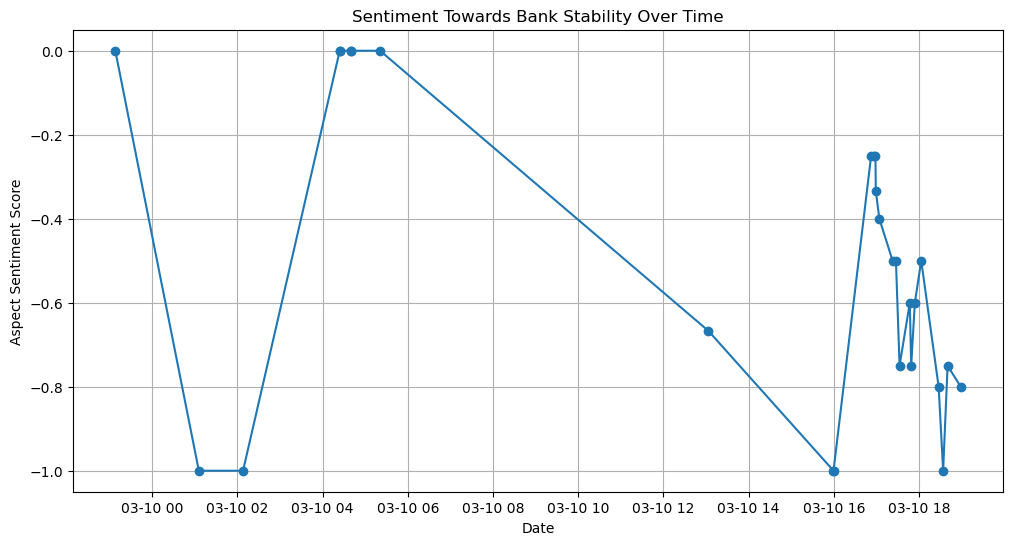

In [ ]:
# Install necessary libraries
# Uncomment the following line if you need to install the libraries
# !pip install torch transformers waybackpy nltk --quiet

# Import statements
from waybackpy import WaybackMachineCDXServerAPI
from bs4 import BeautifulSoup
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import time
import re
import textwrap
import ast
import operator
import functools
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Download NLTK data files
nltk.download('punkt')

def evaluate_expression(content_text, expression):
    """
    Evaluates a complex boolean expression with AND/OR logic on the given content text.

    Parameters:
    - content_text (str): The text to search keywords in.
    - expression (str): The boolean expression to evaluate (e.g., '"Bank of America" and (crisis or stability or bankruptcy)').

    Returns:
    - bool: True if the expression is satisfied by the content text; False otherwise.
    """
    # Define supported operators
    ops = {
        ast.And: operator.and_,
        ast.Or: operator.or_,
    }

    def _eval(node):
        if isinstance(node, ast.BoolOp):
            op = ops[type(node.op)]
            values = [_eval(v) for v in node.values]
            return functools.reduce(op, values)
        elif isinstance(node, ast.Name):
            # Single-word keyword
            return node.id.lower() in content_text
        elif isinstance(node, ast.Str):
            # Multi-word keyword in quotes
            return node.s.lower() in content_text
        else:
            raise ValueError(f'Unsupported expression: {ast.dump(node)}')

    # Replace 'AND'/'OR' with 'and'/'or' and handle multi-word keywords
    expression = expression.replace('AND', 'and').replace('OR', 'or')
    # Parse the expression into an AST
    node = ast.parse(expression, mode='eval').body
    return _eval(node)

def fetch_wayback_news(url, start_date, end_date, expression=None, max_snapshots=50):
    """
    Fetches snapshots from the Wayback Machine within a date range and retrieves content containing specific keywords
    based on a complex boolean expression.

    Parameters:
    - url (str): The URL of the site to search in the Wayback Machine.
    - start_date (str): Start date in 'YYYYMMDD' format.
    - end_date (str): End date in 'YYYYMMDD' format.
    - expression (str): Boolean expression of keywords to filter content.
    - max_snapshots (int): Maximum number of snapshots to fetch and process.

    Returns:
    - List of dictionaries with 'date', 'url', and 'content' for each matching snapshot.
    """
    cdx = WaybackMachineCDXServerAPI(url, start_timestamp=start_date, end_timestamp=end_date)
    results = []

    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))

    snapshot_count = 0

    for snapshot in cdx.snapshots():
        if snapshot_count >= max_snapshots:
            print(f"Reached the maximum of {max_snapshots} snapshots.")
            break

        snapshot_url = snapshot.archive_url
        timestamp = snapshot.timestamp
        print(f"Checking snapshot from {timestamp}: {snapshot_url}")

        time.sleep(2)

        try:
            response = session.get(snapshot_url)
            if response.status_code != 200:
                print(f"Could not fetch snapshot: {snapshot_url}")
                continue
        except requests.ConnectionError as e:
            print(f"Connection error: {e}")
            continue

        soup = BeautifulSoup(response.text, "html.parser")
        content_text = soup.get_text()

        if expression:
            # Evaluate the expression for this content
            if evaluate_expression(content_text.lower(), expression.lower()):
                print(f"Snapshot from {timestamp} matches expression.")
                results.append({
                    "date": timestamp,
                    "url": snapshot_url,
                    "content": content_text
                })
        else:
            # If no expression specified, add all content
            results.append({
                "date": timestamp,
                "url": snapshot_url,
                "content": content_text
            })

        snapshot_count += 1

    return results

def fetch_wayback_news_multiple(urls, start_date, end_date, expression=None, max_snapshots=50):
    """
    Fetches news from multiple URLs.

    Parameters:
    - urls (list): List of URLs to fetch news from.
    - start_date (str): Start date in 'YYYYMMDD' format.
    - end_date (str): End date in 'YYYYMMDD' format.
    - expression (str): Boolean expression of keywords to filter content.
    - max_snapshots (int): Maximum number of snapshots per URL.

    Returns:
    - List of dictionaries with 'date', 'url', and 'content' for each matching snapshot from all URLs.
    """
    all_results = []

    # Loop through each URL and fetch results
    for url in urls:
        print(f"Fetching snapshots for URL: {url}")
        news_results = fetch_wayback_news(url, start_date, end_date, expression, max_snapshots)
        all_results.extend(news_results)

    return all_results

def display_saved_results(news_results):
    """
    Displays the saved results in a square template format.

    Parameters:
    - news_results (list): List of news result dictionaries to display.
    """
    for result in news_results:
        print(f"+{'-'*50}+")
        print(f"| Date: {result['date']}")
        print(f"| URL: {result['url']}")
        print(f"+{'-'*50}+")

        # Wrap content text to a fixed width for a square-like display
        wrapped_text = textwrap.fill(result['content'][:1000], width=50)  # Adjust width as needed
        print(wrapped_text)

        print(f"+{'-'*50}+")
        print("\n")  # Separate entries with a newline for readability

def extract_relevant_sentences_original(content, bank_name, stability_keywords):
    """
    Extracts sentences that mention both the bank and stability-related keywords.

    Parameters:
    - content (str): The content text to search.
    - bank_name (str): The bank's name to look for.
    - stability_keywords (list): List of keywords related to stability.

    Returns:
    - List of relevant sentences.
    """
    sentences = sent_tokenize(content)
    relevant_sentences = []
    for sentence in sentences:
        if bank_name.lower() in sentence.lower():
            for keyword in stability_keywords:
                if keyword.lower() in sentence.lower():
                    relevant_sentences.append(sentence)
                    break  # No need to check other keywords
    return relevant_sentences

def adjust_sentiment_with_keywords(sentence, score):
    """
    Adjusts the sentiment score based on the presence of critical negative keywords.

    Parameters:
    - sentence (str): The sentence being analyzed.
    - score (float): The original sentiment score.

    Returns:
    - Adjusted sentiment score.
    """
    critical_negative_keywords = [
        "collapse", "failure", "bankruptcy", "insolvency",
        "shut down", "liquidation", "bank run", "closure",
        "cease operations", "filed for bankruptcy", "defaults",
        "bailout", "panic", "crisis", "fraud", "ponzi scheme",
        "meltdown", "turmoil", "disaster"
    ]
    for keyword in critical_negative_keywords:
        if keyword.lower() in sentence.lower():
            # Assign a strong negative score
            return -1.0
    return score

def analyze_financial_sentiment(sentences):
    """
    Performs sentiment analysis on financial text using FinBERT, with adjustments for critical keywords.

    Parameters:
    - sentences (list): List of sentences to analyze.

    Returns:
    - Average sentiment score, and list of sentence scores.
    """
    if not sentences:
        return None, []
    sentiment_scores = []
    sentence_scores = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        # Labels: 0 - Negative, 1 - Neutral, 2 - Positive
        sentiment = torch.argmax(probs, dim=1).item()
        if sentiment == 2:
            score = probs[0][2].item()  # Positive score
        elif sentiment == 0:
            score = -probs[0][0].item()  # Negative score
        else:
            score = 0  # Neutral score
        # Adjust score based on critical negative keywords
        score = adjust_sentiment_with_keywords(sentence, score)
        sentiment_scores.append(score)
        sentence_scores.append((sentence, score))
    # Calculate average sentiment score
    average_score = sum(sentiment_scores) / len(sentiment_scores)
    return average_score, sentence_scores

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# List of URLs to fetch news from
urls = [
    "https://finance.yahoo.com",          # Yahoo Finance
    # Add more URLs as needed
]

# Example usage with multiple URLs
start_date = "20230309"  # Start date in YYYYMMDD format
end_date = "20230311"    # End date in YYYYMMDD format
expression = '"Silicon Valley Bank"'  # Updated complex boolean expression
max_snapshots = 50  # Limit the number of snapshots per URL

# Run the function for multiple URLs
all_news_results = fetch_wayback_news_multiple(urls, start_date, end_date, expression, max_snapshots)

# Remove duplicates based on URL
unique_news_results = {result['url']: result for result in all_news_results}.values()

# Filter out empty contents
filtered_news_results = [result for result in unique_news_results if result['content'].strip()]

# Separate objects for selected texts and selected sentences
selected_texts = [
    {
        'date': result['date'],
        'url': result['url'],
        'content': result['content']
    }
    for result in filtered_news_results
]

selected_sentences = []  # List to store selected sentences

# Define the bank name and stability-related keywords (expanded)
bank_name = "Silicon Valley Bank"
stability_keywords = [
    "risk", "risky", "stability", "bankruptcy", "failure",
    "collapse", "insolvent", "liquidity", "credit rating",
    "default", "downgrade", "credit risk", "regulatory action",
    "capital adequacy", "profit warning", "asset quality",
    "earnings miss", "loan default", "write-off", "provisioning",
    "stress test", "capital raise", "market confidence",
    "bank run", "closure", "shut down", "liquidation",
    "insolvency", "cease operations", "filed for bankruptcy",
    "defaults", "bailout", "panic", "crisis", "fraud",
    "ponzi scheme", "meltdown", "turmoil", "disaster"
]

# Preprocess, extract relevant sentences, and analyze sentiment
for result in filtered_news_results:
    content = result['content']
    # Extract relevant sentences using original content
    relevant_sentences = extract_relevant_sentences_original(content, bank_name, stability_keywords)
    result['relevant_sentences'] = relevant_sentences
    # Analyze sentiment
    avg_score, sentence_scores = analyze_financial_sentiment(relevant_sentences)
    result['aspect_sentiment_score'] = avg_score
    result['sentence_scores'] = sentence_scores

    # Collect selected sentences into 'selected_sentences'
    for sentence, score in sentence_scores:
        selected_sentences.append({
            'date': result['date'],
            'url': result['url'],
            'sentence': sentence,
            'sentiment_score': score
        })

    # Print relevant sentences and their sentiment scores for verification
    print(f"URL: {result['url']}")
    print("Relevant Sentences and Sentiment Scores:")
    for sentence, score in sentence_scores:
        print(f"Sentence: {sentence}")
        print(f"Sentiment Score: {score}")
    print("\n")

# Now you have separate objects:
# - 'selected_texts' contains the selected content texts.
# - 'selected_sentences' contains the selected sentences with their sentiment scores.

# You can print or process them later as needed.
# For example, to print all selected texts:
print("Selected Texts:")
for text in selected_texts:
    print(f"Date: {text['date']}")
    print(f"URL: {text['url']}")
    print(f"Content snippet: {text['content'][:200]}")  # Print first 200 characters
    print("\n")

# To print all selected sentences:
print("Selected Sentences:")
for sentence_info in selected_sentences:
    print(f"Date: {sentence_info['date']}")
    print(f"URL: {sentence_info['url']}")
    print(f"Sentence: {sentence_info['sentence']}")
    print(f"Sentiment Score: {sentence_info['sentiment_score']}")
    print("\n")

# Calculate the Bank Stability Score
aspect_sentiment_scores = [
    result['aspect_sentiment_score'] for result in filtered_news_results
    if result['aspect_sentiment_score'] is not None
]

if aspect_sentiment_scores:
    average_aspect_sentiment = np.mean(aspect_sentiment_scores)
    # Normalize the score to a 0-100 scale
    stability_score = (average_aspect_sentiment + 1) * 50
    print(f"\nBank Stability Score: {stability_score:.2f} out of 100")
else:
    print("No relevant sentiment data found to calculate the stability score.")

# (Optional) Visualization
if aspect_sentiment_scores:
    # Prepare data for visualization
    for result in filtered_news_results:
        result['parsed_date'] = datetime.strptime(result['date'], '%Y%m%d%H%M%S')

    filtered_news_results.sort(key=lambda x: x['parsed_date'])

    dates = [result['parsed_date'] for result in filtered_news_results if result['aspect_sentiment_score'] is not None]
    sentiments = [result['aspect_sentiment_score'] for result in filtered_news_results if result['aspect_sentiment_score'] is not None]

    # Plot the sentiment over time
    plt.figure(figsize=(12, 6))
    plt.plot(dates, sentiments, marker='o')
    plt.xlabel('Date')
    plt.ylabel('Aspect Sentiment Score')
    plt.title('Sentiment Towards Bank Stability Over Time')
    plt.grid(True)
    plt.show()
else:
    print("No data available for visualization.")


In [34]:
# # To print all selected texts:
# print("Selected Texts:")
# for text in selected_texts:
#     print(f"Date: {text['date']}")
#     print(f"URL: {text['url']}")
#     print(f"Content snippet: {text['content'][:200]}")  # Print first 200 characters
#     print("\n")

# # To print all selected sentences:
print("Selected Sentences:")
for sentence_info in selected_sentences[4:10]:
    if sentence_info['sentiment_score'] < 0:
        print(f"Date: {sentence_info['date']}")
        print(f"URL: {sentence_info['url']}")
        print(f"Sentence: {sentence_info['sentence']}")
        print(f"Sentiment Score: {sentence_info['sentiment_score']}")
        print("\n")

# # To print all given scores with if condition:
# for sentence_info in selected_sentences:
#     if sentence_info['sentiment_score'] < 0:
#         print(sentence_info['sentiment_score'])

Selected Sentences:
Date: 20230310130304
URL: https://web.archive.org/web/20230310130304/https://finance.yahoo.com/
Sentence: 3 words.The struggles of SVB Financial are spooking investors across the banking world, highlighting the new risks posed by rising interest rates.Yahoo FinanceHere comes the jobs report...Yahoo FinanceStock futures waver ahead of crucial jobs reportYahoo FinanceJay Powell has suddenly has another problemYahoo Finance3 : 55Norfolk Southern CEO Says He’s “Deeply Sorry” for Ohio Train DisasterYahoo Finance Video0 : 51Why a ‘no landing’ scenario isn’t an option for the Fed, according to WSJ’s Nick TimiraosYahoo Finance VideoBiden budget includes oil broadsideYahoo FinanceBitcoin tumbles to 8-week lowYahoo FinanceFormer Theranos COO denied request to stay freeYahoo FinanceBusinessYahoo FinanceWhy Silicon Valley Bank's crisis is rattling America's biggest banksThe struggles of SVB Financial are spooking investors across the banking world, highlighting the new risks po

In [30]:
from docx import Document
import textwrap

# Function to format content text with wrapped lines for readability
def format_content(text, width=80):
    wrapped_text = textwrap.fill(text, width=width)  # Adjust width as needed
    return wrapped_text

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading("Filtered News Data", level=1)

# Add each news result as a separate section in the document
for result in all_news_results:
    # Add date and URL as a header
    doc.add_heading(f"Date: {result['date']}", level=2)
    doc.add_paragraph(f"URL: {result['url']}")
    
    # Add formatted content with wrapped text
    formatted_content = format_content(result['content'], width=80)  # Adjust width for readability
    doc.add_paragraph(formatted_content)
    
    # Add a separator for readability
    doc.add_paragraph("\n" + "-"*50 + "\n")

# Define the path to save the Word file

output_path = r"C:\Users\hesen\OneDrive\Documents\GitHub\PhD\Database\filtered_news_data.docx"

# Save the Word document
doc.save(output_path)

print(f"Data successfully saved to {output_path}")


Data successfully saved to C:\Users\hesen\OneDrive\Documents\GitHub\PhD\Database\filtered_news_data.docx


Data From Sentiment140

In [10]:
import pandas as pd
import re

def evaluate_expression(content_text, expression):
    """
    Evaluates a complex boolean expression with AND/OR logic on the given content text.
    
    Parameters:
    - content_text (str): The text to search keywords in.
    - expression (str): The boolean expression to evaluate (e.g., "bank OR insurance AND crisis OR stability").
    
    Returns:
    - bool: True if the expression is satisfied by the content text; False otherwise.
    """
    # Tokenize the expression by splitting keywords and operators
    tokens = re.split(r'\s+(AND|OR)\s+', expression)
    result = None
    current_op = None

    for token in tokens:
        token = token.strip()
        if token in ("AND", "OR"):
            # Set the current operation to be used in the next iteration
            current_op = token
        else:
            # Check if the current keyword exists in the content text
            keyword_present = token.lower() in content_text

            if result is None:
                # Initialize result with the first keyword presence
                result = keyword_present
            else:
                # Apply the current operator to combine results
                if current_op == "AND":
                    result = result and keyword_present
                elif current_op == "OR":
                    result = result or keyword_present

    return result

def load_sentiment_data(file_path, start_date=None, end_date=None, expression=None, encoding="ISO-8859-1"):
    # Define column names based on observed data structure
    column_names = ['sentiment', 'tweet_id', 'date', 'query', 'user', 'text']
    
    # Load data in chunks to optimize memory usage
    chunks = pd.read_csv(file_path, encoding=encoding, names=column_names, chunksize=10000)
    
    # Initialize empty list to store filtered data
    filtered_data = []
    
    # Iterate through chunks
    for chunk in chunks:
        # Convert date column to datetime
        chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
        
        # Filter by date range if specified
        if start_date and end_date:
            chunk = chunk[(chunk['date'] >= start_date) & (chunk['date'] <= end_date)]
        
        # Apply keyword expression filter if specified
        if expression:
            # Apply the expression evaluation function for each row in the chunk
            keyword_filter = chunk['text'].apply(lambda text: evaluate_expression(text.lower(), expression))
            chunk = chunk[keyword_filter]
        
        # Append filtered data to the list
        filtered_data.append(chunk)
    
    # Concatenate all filtered chunks into a single DataFrame
    return pd.concat(filtered_data, ignore_index=True)

# Example usage
file_path = r"C:\Users\hesen\OneDrive\Documents\GitHub\PhD\Database\textual_data (sentiment140).csv"
start_date = '2009-04-06'
end_date = '2010-04-25'
expression = "JPMorgan"

# Load data with filters
sentiment_data = load_sentiment_data(file_path, start_date=start_date, end_date=end_date, expression=expression)


C:\Users\hesen\AppData\Local\Temp\ipykernel_17776\1607616847.py:54: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
C:\Users\hesen\AppData\Local\Temp\ipykernel_17776\1607616847.py:54: FutureWarning: Parsed string "Sat Apr 18 07:05:35 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
C:\Users\hesen\AppData\Local\Temp\ipykernel_17776\1607616847.py:54: FutureWarning: Parsed string "Sun Apr 19 01:19:44 PDT 2009" included an un-recognize

In [11]:
output_path = r"C:\Users\hesen\OneDrive\Documents\GitHub\PhD\Database\filtered_sentiment140.xlsx"
sentiment_data.to_excel(output_path, index=False)

Data From X (it doesn't pull with free API, will upgrade for the testing when the model is created but for now will use sentiment140 with 1.6 million of tweets)

In [ ]:
# !pip install tweepy
import tweepy

# Replace the following strings with your own keys and tokens

api_key = "Tdm22oQQAqpSkvdZckuy9FjCo"
api_key_secret = "M2CylnMt4DWsuJXnJFRBkQGhV6VIoJmwJv7EYNsKiNUU9OOzeA"
access_token = "1847643255808413697-FZc6sUg7XvsKMeMPWk3LsR6VqXSMNw"
access_token_secret = "ACkd8kt2SPwmCBMa2VOSg5liLq3sezk2tOzKdZFF0yOr2"


# Authenticate to Twitter using OAuth1
auth = tweepy.OAuth1UserHandler(api_key, api_key_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Get the most recent tweets from a specific user's timeline
screen_name = "TwitterUser"  # Replace with the Twitter username you want to look up
tweets = api.user_timeline(screen_name=screen_name, count=10, tweet_mode="extended")

# Print the tweets
for tweet in tweets:
    print(f"{tweet.user.screen_name}: {tweet.full_text}\n")

Dara From Refinitiv

In [12]:
!pip install refinitiv-dataplatform

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/498.1 kB ? eta -:--:--
   ----------------------- ---------------- 286.7/498.1 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 498.1/498.1 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.0 kB ? eta -:--:--
   ---------------------------------------- 65.0/65.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.5 kB ? eta -:--:--
   ------

In [ ]:
import refinitiv.dataplatform as rdp
import datetime

# 1. Authenticate with Refinitiv API
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'

rdp.open_platform_session(app_key=client_id, client_secret=client_secret)

# 2. Define the parameters
# Adjust the `universe` parameter to match the specific symbol for Bank of America (e.g., 'BAC.N' for the NYSE listing).
params = {
    "universe": ["BAC.N"],  # Bank of America symbol on NYSE
    "fields": ["NEWS_SENTIMENT_SCORE", "NEWS_SENTIMENT_POSITIVE", "NEWS_SENTIMENT_NEGATIVE"],
    "start": "2023-01-01",  # start date (YYYY-MM-DD)
    "end": datetime.date.today().isoformat(),  # end date as today's date
    "frequency": "D"  # daily sentiment scores
}

# 3. Retrieve sentiment data
try:
    # Fetching historical sentiment scores for the specified date range
    sentiment_data = rdp.get_historical_data("NewsSentiment", parameters=params)
    print(sentiment_data)
except Exception as e:
    print(f"Error fetching sentiment data: {e}")

# 4. Close session after data retrieval
rdp.close_platform_session()
